In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
roughdraft = pd.read_csv("mergeddata.csv")
wordFrequency = {}

for y in roughdraft["Place Name_x"]:
	if y in wordFrequency.keys():
		wordFrequency[y] = wordFrequency.get(y)+1
	else: 
		wordFrequency[y] = 1


print(wordFrequency)

{'San Diego': 652, nan: 112, 'Lemon Grove': 19, 'Spring Valley': 26, 'National City': 62, 'Chula Vista': 81, 'Otay Castle Park': 14, 'Imperial Beach': 20, 'Coronado': 16, 'Grossmont Mount Helix': 16, 'La Mesa': 37, 'El Cajon': 66, 'Santee': 12, 'Lakeside': 8, 'Del Mar': 5, 'Solana Beach': 5, 'Cardiff by the Sea': 5, 'Encinitas': 10, 'Carlsbad': 16, 'Oceanside': 50, 'Vista': 31, 'San Marcos': 1}


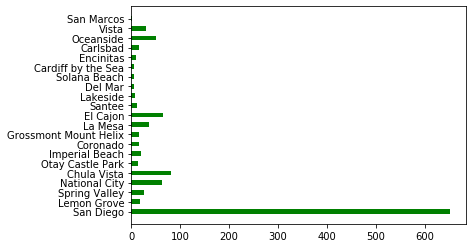

In [3]:
for x in wordFrequency.keys():
    if x != 'nan':
        plt.barh(x, wordFrequency.get(x), 0.5, color='g')

In [4]:
roughdraft.head(10)

,Census Tract Name,Block Group,Place Name_x,Total persons,Male persons age under 5 years,Male persons age 5 years,Male persons age 6 years,Male persons age 7-9 years,Male persons age 10-13 years,Male persons age 14 years,...,Renter occupied housing units with 1.01 or more persons per room,Total Black occupied housing units with 1.01 or more persons per room,Black owner occupied housing units with 1.01 or more persons per room,Black renter occupied housing units with 1.01 or more persons per room,Persons in occupied housing units with all plumbing facilities,Persons in occupied housing units lacking one or more plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room with all plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room lacking one or more plumbing facilities,Families with all plumbing facilities,Families lacking one or more plumbing facilities
0,Census Tract 1,1,San Diego,901,31,6,9,29,32,9,...,10,...,...,...,897,4,30,0,225,1
1,Census Tract 1,2,San Diego,683,28,2,9,14,21,6,...,11,...,...,...,683,0,78,0,174,0
2,Census Tract 1,3,San Diego,532,18,4,4,15,26,6,...,13,...,...,...,532,0,34,0,136,0
3,Census Tract 1,4,San Diego,421,9,3,5,5,7,3,...,9,...,...,...,421,0,21,0,119,0
4,Census Tract 1,5,San Diego,489,12,2,4,6,13,4,...,0,...,...,...,486,3,9,0,142,1
5,Census Tract 1,6,San Diego,498,19,2,3,11,11,7,...,0,...,...,...,489,9,6,0,137,1
6,Census Tract 1,9,San Diego,6,0,0,0,0,0,0,...,...,...,...,...,...,...,...,...,...,...
7,Census Tract 2,1,San Diego,"1,082",32,10,5,21,34,8,...,20,...,...,...,"1,081",1,53,0,283,0
8,Census Tract 2,2,San Diego,"2,151",83,18,14,42,52,11,...,74,...,...,...,"2,008",33,150,0,529,7
9,Census Tract 2,3,San Diego,"1,348",39,2,8,23,37,7,...,68,...,...,...,"1,331",17,103,0,344,7


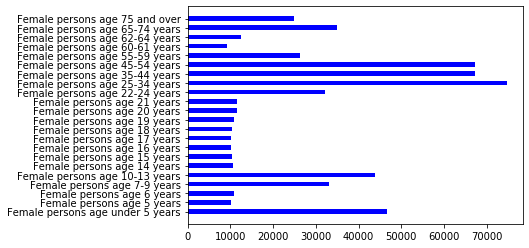

In [5]:
for i in range(26, 48):
    a = 0
    for j in roughdraft.iloc[ : , i ]:
        if j != "...":
            a = a + int(j)
    plt.barh(roughdraft.columns[i], a, 0.5, color='b')

Looking for trends
Try:
Persons in occupied housing units with all plumbing facilities
vs
Marital Status

In [6]:
data = pd.read_csv("cleanData.csv")
relevantdata = pd.DataFrame()

relevantdata["Full facilities"] = data["Persons in occupied housing units with all plumbing facilities"]
relevantdata["Total People"] = data["Total persons"]

relevantdata["Male married"] = data["Male persons now married (excludes separated)"]
relevantdata["Male unmarried"] = data["Male persons never married"]
relevantdata["Female married"] = data["Female persons now married (excludes separated)"]
relevantdata["Female unmarried"] = data["Female persons never married"]


relevantdata["Total incarcerated"] = data["Total persons inmate of institution"]
relevantdata["Minors incarcerated"] = data["Persons under 18 inmate of institution"]

for col in relevantdata:
    relevantdata[col] = relevantdata[col].str.replace("$","")
    relevantdata[col] = relevantdata[col].str.replace(",","")
    relevantdata[col] = relevantdata[col].str.replace(".00","")
    relevantdata[col] = relevantdata[col].replace("...", np.nan)
    relevantdata[col] = relevantdata[col].replace(" ... ", np.nan)
    relevantdata[col] = relevantdata[col].replace(" -   ", np.nan)
    relevantdata[col] = relevantdata[col].replace("", np.nan)
    relevantdata = relevantdata.dropna()
    relevantdata[col] = relevantdata[col].astype(str).astype(int)


relevantdata["Men Percent Married"] = relevantdata["Male married"] / (relevantdata["Male married"] + relevantdata["Male unmarried"])
relevantdata["Female Percent Married"] = relevantdata["Female married"] / (relevantdata["Female married"] + relevantdata["Female unmarried"]) 

relevantdata["Percent incarcerated"] = relevantdata["Total incarcerated"]/relevantdata["Total People"]

relevantdata["Percent full facilities"] = relevantdata["Full facilities"]/relevantdata["Total People"]
print(relevantdata["Percent full facilities"])
print(relevantdata["Men Percent Married"])

relevantdata = relevantdata[relevantdata["Percent full facilities"] <= 1]

relevantdata

0       0.995560
1       1.000000
2       1.000000
3       1.000000
4       0.993865
          ...   
1258    1.000000
1259    0.996310
1260    1.000000
1261    0.934685
1262    0.989091
Name: Percent full facilities, Length: 1083, dtype: float64
0       0.697183
1       0.691943
2       0.722543
3       0.711538
4       0.782609
          ...   
1258    0.750000
1259    0.849462
1260    0.768421
1261    0.734694
1262    0.784038
Name: Men Percent Married, Length: 1083, dtype: float64


,Full facilities,Total People,Male married,Male unmarried,Female married,Female unmarried,Total incarcerated,Minors incarcerated,Men Percent Married,Female Percent Married,Percent incarcerated,Percent full facilities
0,897,901,198,86,202,94,0,0,0.697183,0.682432,0.0,0.995560
1,683,683,146,65,148,66,0,0,0.691943,0.691589,0.0,1.000000
2,532,532,125,48,126,56,0,0,0.722543,0.692308,0.0,1.000000
3,421,421,111,45,109,43,0,0,0.711538,0.717105,0.0,1.000000
4,486,489,126,35,128,43,0,0,0.782609,0.748538,0.0,0.993865
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,108,108,24,8,24,7,0,0,0.750000,0.774194,0.0,1.000000
1259,270,271,79,14,79,21,0,0,0.849462,0.790000,0.0,0.996310
1260,259,259,73,22,75,15,0,0,0.768421,0.833333,0.0,1.000000
1261,415,444,108,39,109,23,0,0,0.734694,0.825758,0.0,0.934685


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


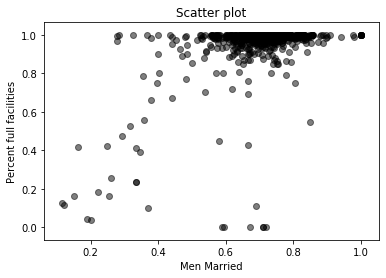

In [7]:
plt.scatter(relevantdata["Men Percent Married"], relevantdata["Percent full facilities"], c=(0,0,0), alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Men Married')
plt.ylabel('Percent full facilities')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


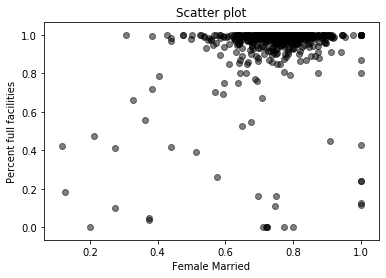

In [8]:
plt.scatter(relevantdata["Female Percent Married"], relevantdata["Percent full facilities"], c=(0,0,0), alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Female Married')
plt.ylabel('Percent full facilities')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


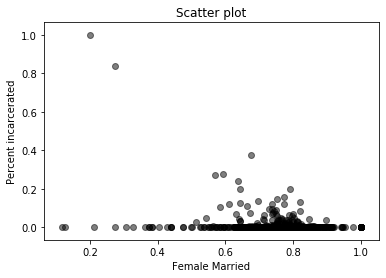

In [9]:
plt.scatter(relevantdata["Female Percent Married"], relevantdata["Percent incarcerated"], c=(0,0,0), alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Female Married')
plt.ylabel('Percent incarcerated')
plt.show()

In [10]:
ogdata = pd.read_csv("mergeddata.csv")
ogdata

,Census Tract Name,Block Group,Place Name_x,Total persons,Male persons age under 5 years,Male persons age 5 years,Male persons age 6 years,Male persons age 7-9 years,Male persons age 10-13 years,Male persons age 14 years,...,Renter occupied housing units with 1.01 or more persons per room,Total Black occupied housing units with 1.01 or more persons per room,Black owner occupied housing units with 1.01 or more persons per room,Black renter occupied housing units with 1.01 or more persons per room,Persons in occupied housing units with all plumbing facilities,Persons in occupied housing units lacking one or more plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room with all plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room lacking one or more plumbing facilities,Families with all plumbing facilities,Families lacking one or more plumbing facilities
0,Census Tract 1,1,San Diego,901,31,6,9,29,32,9,...,10,...,...,...,897,4,30,0,225,1
1,Census Tract 1,2,San Diego,683,28,2,9,14,21,6,...,11,...,...,...,683,0,78,0,174,0
2,Census Tract 1,3,San Diego,532,18,4,4,15,26,6,...,13,...,...,...,532,0,34,0,136,0
3,Census Tract 1,4,San Diego,421,9,3,5,5,7,3,...,9,...,...,...,421,0,21,0,119,0
4,Census Tract 1,5,San Diego,489,12,2,4,6,13,4,...,0,...,...,...,486,3,9,0,142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,Census Tract 199,3,NaN,271,5,1,0,9,16,2,...,17,...,...,...,270,1,57,0,83,0
1260,Census Tract 199,3,NaN,259,4,5,2,9,6,4,...,21,...,...,...,259,0,38,0,78,0
1261,Census Tract 199,9,NaN,444,14,2,3,21,19,3,...,17,...,...,...,415,1,58,0,115,0
1262,Census Tract 199,9,NaN,550,12,1,4,8,17,6,...,10,...,...,...,544,6,25,6,173,1


In [11]:
prisondata = ogdata.iloc[:, 4:13]
for col in prisondata:
    prisondata[col] = prisondata[col].str.replace(",","")
    prisondata[col] = prisondata[col].replace("...", np.nan)
    prisondata[col] = prisondata[col].replace(" ... ", np.nan)
    prisondata[col] = prisondata[col].replace("", np.nan)
    prisondata = prisondata.dropna()
    prisondata[col] = prisondata[col].astype(str).astype(int)

prisondata["Total minors"] = prisondata["Male persons age under 5 years"] + prisondata["Male persons age 5 years"] + prisondata["Male persons age 6 years"] + prisondata["Male persons age 7-9 years"] + prisondata["Male persons age 10-13 years"] + prisondata["Male persons age 14 years"] + prisondata["Male persons age 15 years"] + prisondata["Male persons age 16 years"] + prisondata["Male persons age 17 years"]
prisondata

,Male persons age under 5 years,Male persons age 5 years,Male persons age 6 years,Male persons age 7-9 years,Male persons age 10-13 years,Male persons age 14 years,Male persons age 15 years,Male persons age 16 years,Male persons age 17 years,Total minors
0,31,6,9,29,32,9,15,6,11,148
1,28,2,9,14,21,6,3,9,4,96
2,18,4,4,15,26,6,7,7,4,91
3,9,3,5,5,7,3,4,1,7,44
4,12,2,4,6,13,4,3,4,2,50
...,...,...,...,...,...,...,...,...,...,...
1259,5,1,0,9,16,2,1,1,3,38
1260,4,5,2,9,6,4,0,6,3,39
1261,14,2,3,21,19,3,5,4,5,76
1262,12,1,4,8,17,6,7,8,6,69


In [12]:
prisonfdata = ogdata.iloc[:, 26:35]
for col in prisonfdata:
    prisonfdata[col] = prisonfdata[col].str.replace(",","")
    prisonfdata[col] = prisonfdata[col].replace("...", np.nan)
    prisonfdata[col] = prisonfdata[col].replace(" ... ", np.nan)
    prisonfdata[col] = prisonfdata[col].replace("", np.nan)
    prisonfdata = prisonfdata.dropna()
    prisonfdata[col] = prisonfdata[col].astype(str).astype(int)


prisonfdata["Total minorsF"] = prisonfdata["Female persons age under 5 years"] + prisonfdata["Female persons age 5 years"] + prisonfdata["Female persons age 6 years"] + prisonfdata["Female persons age 7-9 years"] + prisonfdata["Female persons age 10-13 years"] + prisonfdata["Female persons age 14 years"] + prisonfdata["Female persons age 15 years"] + prisonfdata["Female persons age 16 years"] + prisonfdata["Female persons age 17 years"]
prisonfdata

,Female persons age under 5 years,Female persons age 5 years,Female persons age 6 years,Female persons age 7-9 years,Female persons age 10-13 years,Female persons age 14 years,Female persons age 15 years,Female persons age 16 years,Female persons age 17 years,Total minorsF
0,34,5,14,24,34,10,6,6,7,140
1,23,7,5,20,39,4,9,12,5,124
2,12,4,3,13,26,7,8,6,9,88
3,11,1,4,3,17,5,6,6,5,58
4,17,3,2,13,18,2,3,3,5,66
...,...,...,...,...,...,...,...,...,...,...
1259,8,1,2,8,10,2,5,6,3,45
1260,13,2,2,7,8,2,3,1,4,42
1261,13,3,5,15,23,2,9,2,2,74
1262,9,0,4,14,15,8,7,3,3,63


In [13]:
totaldata = pd.DataFrame()

totaldata["Male married"] = data["Male persons now married (excludes separated)"]
totaldata["Male unmarried"] = data["Male persons never married"]
totaldata["Female married"] = data["Female persons now married (excludes separated)"]
totaldata["Female unmarried"] = data["Female persons never married"]

totaldata["Minors incarcerated"] = data["Persons under 18 inmate of institution"]

for col in totaldata:
    totaldata[col] = totaldata[col].str.replace(",","")
    totaldata[col] = totaldata[col].replace("...", np.nan)
    totaldata[col] = totaldata[col].replace(" ... ", np.nan)
    totaldata[col] = totaldata[col].replace("", np.nan)
    totaldata = totaldata.dropna()
    totaldata[col] = totaldata[col].astype(str).astype(int)

totaldata["Total female minors"] = prisonfdata["Total minorsF"]
totaldata["Total male minors"] = prisondata["Total minors"]

totaldata["Men Percent Married"] = totaldata["Male married"] / (totaldata["Male married"] + totaldata["Male unmarried"])
totaldata["Female Percent Married"] = totaldata["Female married"] / (totaldata["Female married"] + totaldata["Female unmarried"]) 

totaldata["Percent minors incarcerated"] = totaldata["Minors incarcerated"]/(totaldata["Total female minors"] + totaldata["Total male minors"])

totaldata

,Male married,Male unmarried,Female married,Female unmarried,Minors incarcerated,Total female minors,Total male minors,Men Percent Married,Female Percent Married,Percent minors incarcerated
0,198,86,202,94,0,140,148,0.697183,0.682432,0.0
1,146,65,148,66,0,124,96,0.691943,0.691589,0.0
2,125,48,126,56,0,88,91,0.722543,0.692308,0.0
3,111,45,109,43,0,58,44,0.711538,0.717105,0.0
4,126,35,128,43,0,66,50,0.782609,0.748538,0.0
...,...,...,...,...,...,...,...,...,...,...
1259,79,14,79,21,0,45,38,0.849462,0.790000,0.0
1260,73,22,75,15,0,42,39,0.768421,0.833333,0.0
1261,108,39,109,23,0,74,76,0.734694,0.825758,0.0
1262,167,46,170,32,0,63,69,0.784038,0.841584,0.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


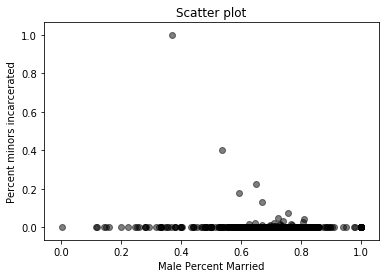

In [14]:
plt.scatter(totaldata["Men Percent Married"], totaldata["Percent minors incarcerated"], c=(0,0,0), alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Male Percent Married')
plt.ylabel('Percent minors incarcerated')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


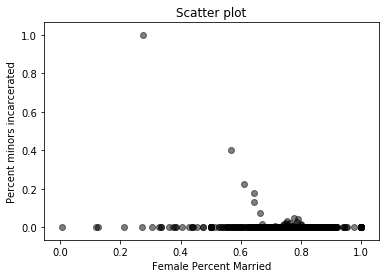

In [15]:
plt.scatter(totaldata["Female Percent Married"], totaldata["Percent minors incarcerated"], c=(0,0,0), alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Female Percent Married')
plt.ylabel('Percent minors incarcerated')
plt.show()

In [16]:
totaldata["Percent minors incarcerated"] = totaldata["Percent minors incarcerated"].replace(0, np.nan)
totaldata = totaldata.dropna()
totaldata

,Male married,Male unmarried,Female married,Female unmarried,Minors incarcerated,Total female minors,Total male minors,Men Percent Married,Female Percent Married,Percent minors incarcerated
16,173,56,180,91,5,36,31,0.755459,0.664207,0.074627
18,451,241,483,306,58,142,118,0.651734,0.612167,0.223077
22,211,81,218,62,7,68,71,0.722603,0.778571,0.050360
210,343,122,372,94,5,392,438,0.737634,0.798283,0.006024
243,147,89,149,70,1,148,173,0.622881,0.680365,0.003115
249,204,70,204,76,1,167,155,0.744526,0.728571,0.003106
253,185,80,203,61,2,236,240,0.698113,0.768939,0.004202
258,136,81,140,69,6,194,204,0.626728,0.669856,0.015075
345,288,488,22,58,6,0,6,0.371134,0.275000,1.000000
388,227,91,234,94,1,73,80,0.713836,0.713415,0.006536


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


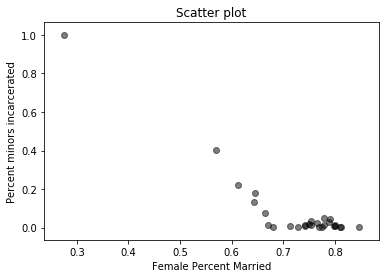

In [17]:
plt.scatter(totaldata["Female Percent Married"], totaldata["Percent minors incarcerated"], c=(0,0,0), alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Female Percent Married')
plt.ylabel('Percent minors incarcerated')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


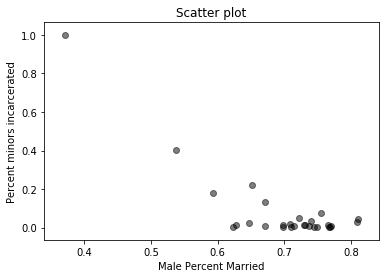

In [18]:
plt.scatter(totaldata["Men Percent Married"], totaldata["Percent minors incarcerated"], c=(0,0,0), alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Male Percent Married')
plt.ylabel('Percent minors incarcerated')
plt.show()

In [19]:
totaldata

,Male married,Male unmarried,Female married,Female unmarried,Minors incarcerated,Total female minors,Total male minors,Men Percent Married,Female Percent Married,Percent minors incarcerated
16,173,56,180,91,5,36,31,0.755459,0.664207,0.074627
18,451,241,483,306,58,142,118,0.651734,0.612167,0.223077
22,211,81,218,62,7,68,71,0.722603,0.778571,0.050360
210,343,122,372,94,5,392,438,0.737634,0.798283,0.006024
243,147,89,149,70,1,148,173,0.622881,0.680365,0.003115
249,204,70,204,76,1,167,155,0.744526,0.728571,0.003106
253,185,80,203,61,2,236,240,0.698113,0.768939,0.004202
258,136,81,140,69,6,194,204,0.626728,0.669856,0.015075
345,288,488,22,58,6,0,6,0.371134,0.275000,1.000000
388,227,91,234,94,1,73,80,0.713836,0.713415,0.006536


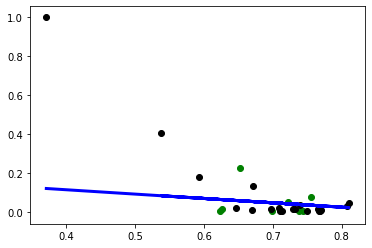

Coefficients: 
 [[-0.22341225]]
Mean squared error: 0.05
Coefficient of determination: 0.11


In [20]:
X = totaldata.iloc[:, 7].values.reshape(-1, 1)  # values converts it into a numpy array
Y = totaldata.iloc[:, 9].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column


# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
Y_train = Y[:-20]
Y_test = Y[-20:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(X_train, Y_train, color = "green")
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

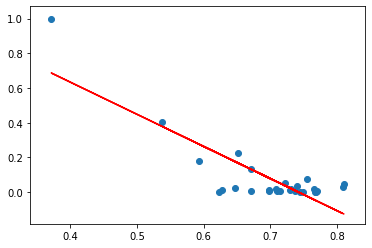

In [21]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [22]:
totaldata["log_men_married"] = np.log(totaldata["Men Percent Married"])
totaldata

C:\Users\Veronblanc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Male married,Male unmarried,Female married,Female unmarried,Minors incarcerated,Total female minors,Total male minors,Men Percent Married,Female Percent Married,Percent minors incarcerated,log_men_married
16,173,56,180,91,5,36,31,0.755459,0.664207,0.074627,-0.280430
18,451,241,483,306,58,142,118,0.651734,0.612167,0.223077,-0.428119
22,211,81,218,62,7,68,71,0.722603,0.778571,0.050360,-0.324896
210,343,122,372,94,5,392,438,0.737634,0.798283,0.006024,-0.304307
243,147,89,149,70,1,148,173,0.622881,0.680365,0.003115,-0.473399
249,204,70,204,76,1,167,155,0.744526,0.728571,0.003106,-0.295008
253,185,80,203,61,2,236,240,0.698113,0.768939,0.004202,-0.359374
258,136,81,140,69,6,194,204,0.626728,0.669856,0.015075,-0.467242
345,288,488,22,58,6,0,6,0.371134,0.275000,1.000000,-0.991192
388,227,91,234,94,1,73,80,0.713836,0.713415,0.006536,-0.337101


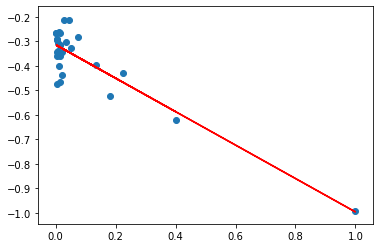

Coefficients: 
 [[-0.22341225]]
Mean squared error: 0.00
Coefficient of determination: 0.79


In [30]:
X = totaldata.iloc[:, 9].values.reshape(-1, 1)  # values converts it into a numpy array
Y = totaldata.iloc[:, 10].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))

In [25]:
totaldata["log_women_married"] = np.log(totaldata["Female Percent Married"])
totaldata


C:\Users\Veronblanc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Male married,Male unmarried,Female married,Female unmarried,Minors incarcerated,Total female minors,Total male minors,Men Percent Married,Female Percent Married,Percent minors incarcerated,log_men_married,log_women_married
16,173,56,180,91,5,36,31,0.755459,0.664207,0.074627,-0.280430,-0.409162
18,451,241,483,306,58,142,118,0.651734,0.612167,0.223077,-0.428119,-0.490750
22,211,81,218,62,7,68,71,0.722603,0.778571,0.050360,-0.324896,-0.250295
210,343,122,372,94,5,392,438,0.737634,0.798283,0.006024,-0.304307,-0.225292
243,147,89,149,70,1,148,173,0.622881,0.680365,0.003115,-0.473399,-0.385125
249,204,70,204,76,1,167,155,0.744526,0.728571,0.003106,-0.295008,-0.316670
253,185,80,203,61,2,236,240,0.698113,0.768939,0.004202,-0.359374,-0.262743
258,136,81,140,69,6,194,204,0.626728,0.669856,0.015075,-0.467242,-0.400692
345,288,488,22,58,6,0,6,0.371134,0.275000,1.000000,-0.991192,-1.290984
388,227,91,234,94,1,73,80,0.713836,0.713415,0.006536,-0.337101,-0.337692


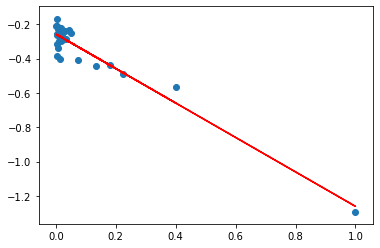

Coefficients: 
 [[-0.22341225]]
Mean squared error: 0.00
Coefficient of determination: 0.92


In [28]:
X = totaldata.iloc[:, 9].values.reshape(-1, 1)  # values converts it into a numpy array
Y = totaldata.iloc[:, 11].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))